# ARSHIA J S

# A Project for an Internship at "OASIS INFOBYTE"

# Task 1 : Iris Flower Classification

# Dataset : "Iris.csv"

Importing modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

Loading dataset

In [4]:
iris_df=pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
print("Species Counts")
iris_df["Species"].value_counts()

Species Counts


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Visualizing Dataset

In [9]:
#correlation
corr_=iris_df.corr()
corr_

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

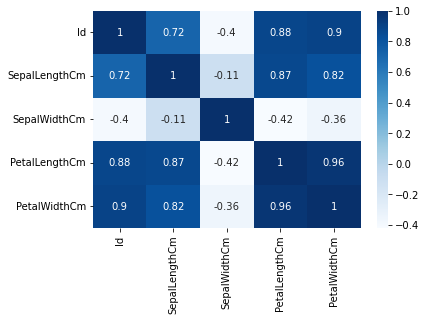

In [10]:
sns.heatmap(corr_, cmap="Blues", annot=True)

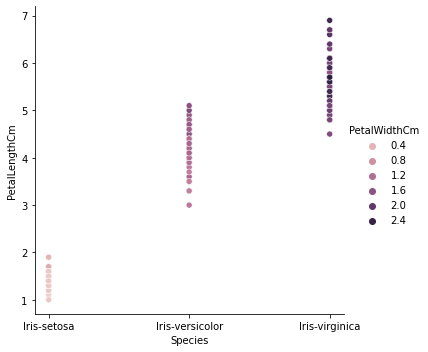

In [11]:
sns.relplot(x = "Species", y = "PetalLengthCm",hue = "PetalWidthCm", data = iris_df)
plt.show()

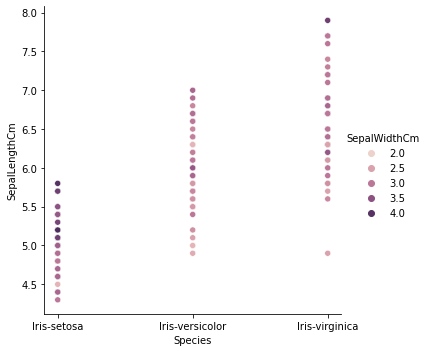

In [12]:
sns.relplot(x = "Species", y = "SepalLengthCm", hue = "SepalWidthCm", data = iris_df)
plt.show()

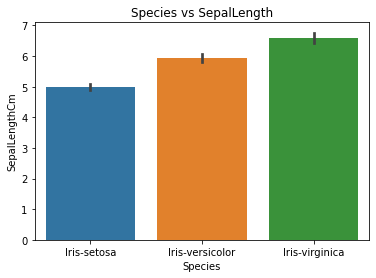

In [13]:
sns.barplot(x = "Species", y = "SepalLengthCm", data=iris_df)
plt.title("Species vs SepalLength")
plt.show()

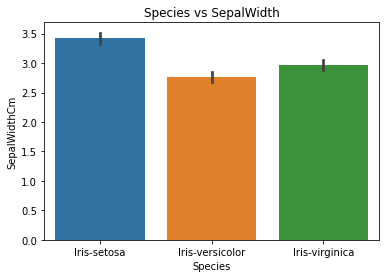

In [14]:
sns.barplot(x = "Species", y = "SepalWidthCm", data=iris_df)
plt.title("Species vs SepalWidth")
plt.show()

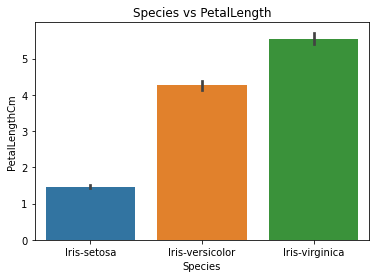

In [15]:
sns.barplot(x = "Species", y = "PetalLengthCm", data=iris_df)
plt.title("Species vs PetalLength")
plt.show()

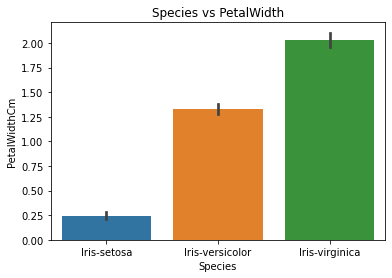

In [16]:
sns.barplot(x = "Species", y = "PetalWidthCm", data=iris_df)
plt.title("Species vs PetalWidth")
plt.show()

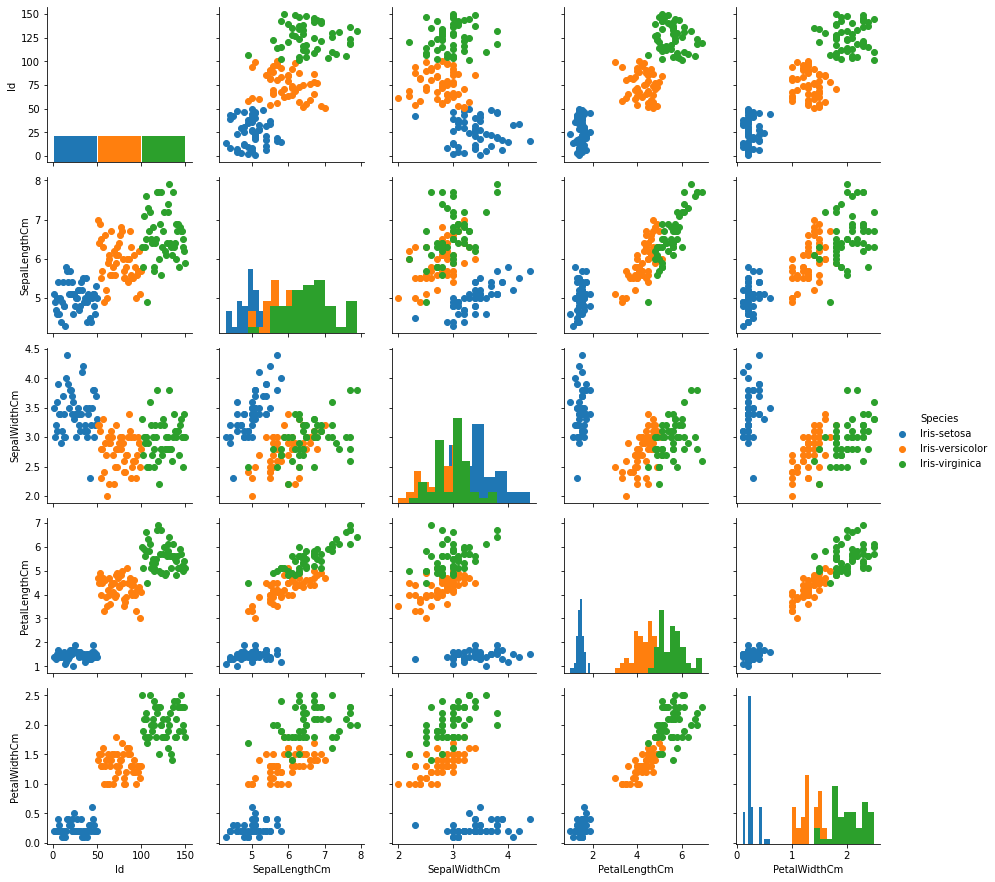

In [17]:
graph = sns.PairGrid(iris_df, hue = "Species")
graph = graph.map_diag(plt.hist)
graph = graph.map_offdiag(plt.scatter)
graph = graph.add_legend()
plt.show()

Splitting The Dataset For Traning and Testing

In [18]:
X = iris_df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
Y = iris_df["Species"]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [20]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
65,6.7,3.1,4.4,1.4
31,5.4,3.4,1.5,0.4
101,5.8,2.7,5.1,1.9
64,5.6,2.9,3.6,1.3
130,7.4,2.8,6.1,1.9
...,...,...,...,...
5,5.4,3.9,1.7,0.4
15,5.7,4.4,1.5,0.4
76,6.8,2.8,4.8,1.4
43,5.0,3.5,1.6,0.6


In [21]:
Y_train

65     Iris-versicolor
31         Iris-setosa
101     Iris-virginica
64     Iris-versicolor
130     Iris-virginica
            ...       
5          Iris-setosa
15         Iris-setosa
76     Iris-versicolor
43         Iris-setosa
73     Iris-versicolor
Name: Species, Length: 120, dtype: object

In [22]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
9,4.9,3.1,1.5,0.1
2,4.7,3.2,1.3,0.2
145,6.7,3.0,5.2,2.3
112,6.8,3.0,5.5,2.1
6,4.6,3.4,1.4,0.3
23,5.1,3.3,1.7,0.5
77,6.7,3.0,5.0,1.7
138,6.0,3.0,4.8,1.8
104,6.5,3.0,5.8,2.2


In [23]:
Y_test

0          Iris-setosa
9          Iris-setosa
2          Iris-setosa
145     Iris-virginica
112     Iris-virginica
6          Iris-setosa
23         Iris-setosa
77     Iris-versicolor
138     Iris-virginica
104     Iris-virginica
105     Iris-virginica
110     Iris-virginica
36         Iris-setosa
27         Iris-setosa
114     Iris-virginica
132     Iris-virginica
83     Iris-versicolor
120     Iris-virginica
70     Iris-versicolor
136     Iris-virginica
116     Iris-virginica
49         Iris-setosa
61     Iris-versicolor
59     Iris-versicolor
32         Iris-setosa
29         Iris-setosa
58     Iris-versicolor
41         Iris-setosa
81     Iris-versicolor
16         Iris-setosa
Name: Species, dtype: object

SUPPORT VECTOR CLASSIFIER

In [24]:
from sklearn.svm import SVC
svc_model = SVC().fit(X_train, Y_train)

In [25]:
predictions = svc_model.predict(X)
df = {"Actual":Y,"Predicted":predictions}
pd.DataFrame(df)

,Actual,Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica


In [26]:
y_hat = svc_model.predict(X_test)

In [27]:
#Classification Report Using SVC model
print("\t\t  CLASSIFICATION REPORT")
print("="*64)
print(classification_report(Y_test, y_hat))
print("="*64)

		  CLASSIFICATION REPORT
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.83      0.71      0.77         7
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.89      0.87      0.88        30
   weighted avg       0.90      0.90      0.90        30



Confusion Matrix
 [[12  0  0]
 [ 0  5  2]
 [ 0  1 10]]


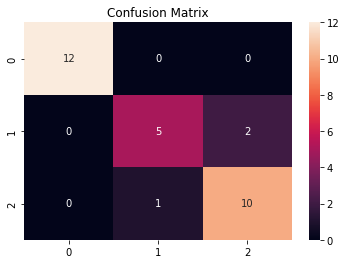

In [28]:
#Confusion Matrix Using SVC model
cm = confusion_matrix(Y_test, y_hat)
print("Confusion Matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.show()

Accuracy of the SVC model

In [29]:
print("Accuracy Of the Support Vector Classifier Model\n",accuracy_score(Y_test, y_hat)*100,'%')

Accuracy Of the Support Vector Classifier Model
 90.0 %


LOGISTIC REGRESSION MODEL FOR CLASSIFICATION

In [30]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train, Y_train)

C:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
pred = lgmodel.predict(X)
pd.DataFrame({"Actual":Y, "Predictions":pred})

,Actual,Predictions
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica


In [32]:
y_hat1 = lgmodel.predict(X_test)

In [33]:
#Classification Report Using Logistic Regression model
print("\t\t  Classification Report")
print("="*64)
print(classification_report(Y_test, y_hat1))
print("="*64)

		  Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.57      0.73         7
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.90        30
      macro avg       0.93      0.86      0.87        30
   weighted avg       0.92      0.90      0.89        30



Confusion Matrix
 [[12  0  0]
 [ 0  4  3]
 [ 0  0 11]]


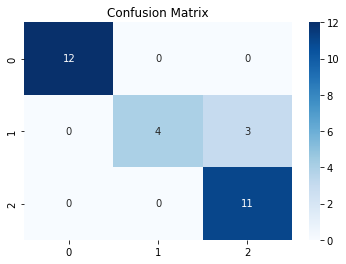

In [34]:
#Confusion Matrix using Logistic Regression model
cn = confusion_matrix(Y_test, y_hat1)
print("Confusion Matrix\n", cn)
sns.heatmap(cn, cmap = "Blues", annot=True)
plt.title("Confusion Matrix")
plt.show()

Accuracy of the LG model

In [35]:
print("Accuarcy Of The Logistic Regression Model:\n", accuracy_score(Y_test, y_hat1)*100, "%")

Accuarcy Of The Logistic Regression Model:
 90.0 %
